# Linear Regression

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=5234s

## Typical PyTorch pipeline

1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training loop
    + forward pass: compute prediction and loss
    + backward pass: gradients
    + update weights

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshaping y because right now it has one row and we want to make it a column vector
# view is build in PyTorch method which will reshape our tensor
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
# SGD -> Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4301.9507
epoch: 20, loss = 3212.2686
epoch: 30, loss = 2423.5403
epoch: 40, loss = 1852.0537
epoch: 50, loss = 1437.5739
epoch: 60, loss = 1136.6979
epoch: 70, loss = 918.1097
epoch: 80, loss = 759.1832
epoch: 90, loss = 643.5543
epoch: 100, loss = 559.3733


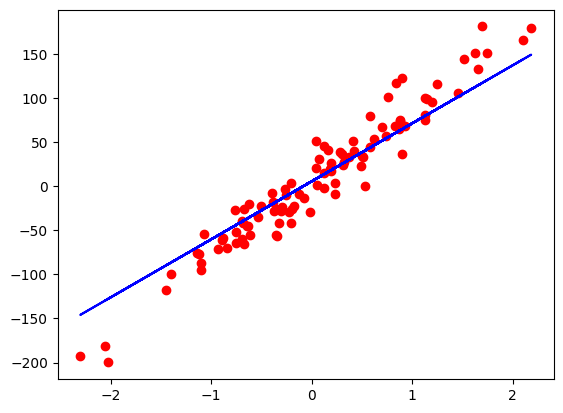

In [4]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()